이 장은 아래와 같은 주제를 다룬다.

- 기계학습Machine Learning의 기본적으로 다루는 주제와 최적화Optimization, 일반화Generalization 사이의 관계의 긴장감에 대한 이해
- 기계학습 모델을 평가하는 방법
- 모델 성능을 개선하는 모범 사례
- 우수한 일반화를 위한 모범 사례

# 5. Fundamentals of machine learning

4장에서 세 가지 사례를 통해 분류Classification 문제와 예측Regression 문제를 해결하기 위해 인공 신경망을 사용하는 방법을 살펴 보았고 과적합Overfitting과 같은 기계학습의 충요한 문제도 살펴 보았다. 이 장에서는 기계학습에 대한 중요한 개념들을 자세하게 살펴보고 모델을 정확하게 평가하는데 중요한 요소와 학습과 일반화 사이에서 모델 성능의 균형을 잡는 방법에 대해 알아 본다.

## 5.1 Generalization: The goal of machine learning

4장에서 문제 해결에 활용할 데이터를 학습 데이터, 검증 데이터, 평가 데이터로 나누었다. 학습 데이터와 동일한 데이터로 모델의 성능을 평가하지 않는 이유는 반복해서 학습을 진행하면 어느 순간 학습 데이터로 평가한 모델의 성능은 개속해서 개선이 되는데, 모델이 학습 과정에서 보지 못한 데이터(검증 데이터)로 모델을 평가하면 어느 시점에 더 이상 성능이 개선되지 않고 나빠지거나 더이상 개선 되지 않는 상황이 발생한다. 이런 현상을 과적합Overfitting이라고 한다.

기계학습에서 가장 기본적인 문제는 최적화와 일반화 사이에 모델 성능의 균형을 잡는 것이다. 최적화는 모델을 학습하는 과정에서 학습 데이터에 대한 성능을 최대로 향상하는 것을 말하고 일반화는 학습 과정에서 보지 못한 데이터에 대해 모델이 얼마나 좋은 성능을 보이는가를 말한다. 기계학습의 목표는 일반화 성능을 높이는 것이다.

### 5.1.1. Underfitting and overfitting

학습 초기에는 학습 데이터에 대한 에러와 검증 데이터에 대한 에러가 함께 감소하는 경향을 보이는데, 이렇게 에러가 함께 감소하는 순간을 과소적합Underfitting 이라고 한다. 모델이 과소적합이며 데이터에 대한 학습이 더 필요한 것으로 판단할 수 있다.

반복적으로 학습이 진행됨에 따라 검증 에러가 더이상 감소하지 않고 평행으로 유지하거나 증가하는 시점이 있다. 이러 순간부터 모델은 학습 데이터에 과하게 최적화가 되기 시작하는 것으로 판단한다. 이렇게 학습 데이터에 대해서는 에러가 지속해서 감소하지만 검증 데이터에 대한 에러는 감소하지 않는 구간을 과대적합Overfitting 이라고 한다.

<img src="images\under-over-fitting.png" title="Underfitting and Overfitting" alt="Fig. Underfitting and Overfitting" style="display=block; margin-left:auto; margin-right:auto;" width="640px"/>

그렇다면 무엇이 이런 과대적합에 영향을 미칠까?

**Noisy Training Data(잡음이 있는 학습 데이터)**

실제 현업에서 데이터를 다루다 보면 사용할 수 없는 데이터도 흔하게 볼 수 있다. MNIST 데이터에서도 다음 그림과 같이 어떤 숫자인지 헷갈리는 데이터가 다수 있다.

<img src="images\weird-mnist-data.png" title="Weird MNIST Training Samples" alt="Fig. Weird MNIST Training Samples" style="display=block; margin-left:auto; margin-right:auto;" width="640px"/>

그림처럼 사람도 헷갈리는 데이터로 학습을 하게 되면 모델 역시 혼란을 초래하게 되어 성능에 나쁜 영향을 미친다.

다른 잡음의 사례로 잘못 주어진 정답을 들 수 있다. 아래 그림과 같이 학습 데이터의 정답에 명백한 오류가 있는 데이터를 사용해서 모델을 학습하게 되면 모델은 엉뚱한 패턴을 학습하게 되어 모델의 성능에 나쁜 영향을 미치게 된다.

<img src="images\mislabeled-mnist.png" title="Weird MNIST Training Samples" alt="Fig. Weird MNIST Training Samples" style="display=block; margin-left:auto; margin-right:auto;" width="640px"/>

모델을 학습 하는 과정에 이런 오류가 있는 데이터를 사용하게 되면 모델의 일반화 성능은 나빠지게 된다. 

**Ambiguous Features(애매모호한 특징들)**

문제가 애매모호Ambiguity 하거나 불확실한(Uncertainty) 경우는 데이터가 잘 정제되고 라벨이 명확하게 되어 있어도 데이터에 잡음이 있을 수 있다.

<img src="images\uncertainty-ambiguity.png" title="Weird MNIST Training Samples" alt="Fig. Weird MNIST Training Samples" style="display=block; margin-left:auto; margin-right:auto;" width="640px"/>

그림에서 특징 공간에서 결정 경계면(왼쪽 그림의 녹색 점선)이 결정되었지만 그 주변으로 검정색 점과 회색점이 혼재되어 있는 영역이 존재한다. 이러한 영역에 분포하는 특징들은 결정 경계면을 기준으로 분류하기에는 애매하다. 모델이 학습 하는 과정에서 이러한 애매한 특징에 대해 학습을 과하게 하게 되면 과대적합이 발생할 수 있다.

**Rare Features(희귀한 특징들) and Spurious Correlations(거짓 상관)**

기계학습에서 모델을 학습할 때 아주 희귀한 특징(Rare Features)을 사용하면 과대적합에 예민해진다. 특이한 경우에 대해 패턴을 학습하게 되면 특이 패턴에 대한 경향성을 갖게 되기 때문이다. 예를 들어 감성 분석에서 특정 단어(예를 들어 체리 열매, cherimoya)가 학습 데이터의 한 케이스에서만 나왔고 그 단어가 감성 분석에 부정을 판정하는데 사용되었고 모델이 희귀한 특징들에 대해 정규화가 약하게 되어 있다면 모델은 그 단어에 높은 가중치를 부여할 수 있다. 이 경우 새로운 문장에 해당 단어가 사용 된다면 모델은 해당 문장을 부정으로 예측할 가능성이 높다. 하지만 정작 그 단어는 부정의 의미를 갖지 않는다.

또한 통계 수치상 상관 관계가 있는 것처럼 보이는 경우가 있는다. 감성 분석의 예를 들면 어떤 단어가 100개의 학습 데이터에서 나타났는데, 그중 54%는 긍정과 관련이 있었고 46%는 부정과 관련이 있었다고 하자. 모델이 학습에 이 데이터를 사용하게 되면 모델은 과대적합 될 수 있다.

이해를 돕기 위해 MNIST 데이터에 같은 차원의 화이트 노이즈를 추가해서 지금까지 설명한 내용이 과대적합에 미치는 영향을 확인해 보자

**Adding white noise channels or all-zeros channels to MNIST**

In [1]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1
)
train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1
)

**Training the same model on MNIST data with noise channels or all-zero channels**

In [2]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model():
    model = keras.Sequential(
        [layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")]
    )
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"]
    )
    return model

model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels,
    train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels,
    train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 7s 16ms/step - loss: 0.6180 - accuracy: 0.8114 - val_loss: 0.2503 - val_accuracy: 0.9234
Epoch 2/10
375/375 [==============================] - 6s 16ms/step - loss: 0.2483 - accuracy: 0.9228 - val_loss: 0.2020 - val_accuracy: 0.9388
Epoch 3/10
375/375 [==============================] - 6s 15ms/step - loss: 0.1618 - accuracy: 0.9496 - val_loss: 0.1859 - val_accuracy: 0.9444
Epoch 4/10
375/375 [==============================] - 5s 15ms/step - loss: 0.1130 - accuracy: 0.9640 - val_loss: 0.1865 - val_accuracy: 0.9445
Epoch 5/10
375/375 [==============================] - 6s 15ms/step - loss: 0.0843 - accuracy: 0.9731 - val_loss: 0.1236 - val_accuracy: 0.9642
Epoch 6/10
375/375 [==============================] - 5s 14ms/step - loss: 0.0612 - accuracy: 0.9804 - val_loss: 0.1257 - val_accuracy: 0.9669
Epoch 7/10
375/375 [==============================] - 5s 14ms/step - loss: 0.0462 - accuracy: 0.9852 - val_loss: 0.1569 - val_accuracy: 0.9604

**Plotting a validation accuracy comparison**

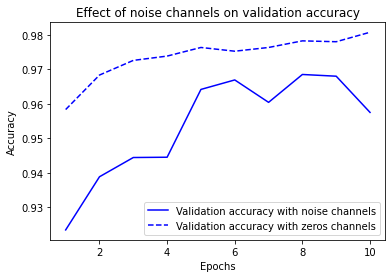

In [3]:
import matplotlib.pyplot as plt

val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, 'b-', label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--", label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

동일한 학습 데이터에 대해서 노이즈가 추가된 데이터로 학습한 모델의 정확도가 더 낮은 것을 알 수 있다. 학습 데이터에 포함된 노이즈는 모델을 과대적합을 유발한다. 이 경우 어떤 특징이 모델의 성능에 영향을 미치는지 확신이 서지 않는 경우 특징 선택Feature Selection을 수행한다. 해결하고자 하는 문제에 따라 특징에 얼마나 많은 정보를 포함하는지 측정하거나 의미가 적은 특징값은 배제하는 등의 방법(4장에서 IMDB 데이터를 사용할 때 단어의 빈도수에 따라 정렬을 한 후 10000개의 단어로 제한하는 경우)을 사용한다. 앞의 예제에서 특징 선택을 수행하면 화이트 노이즈 채널은 제거Filter out 될 수 있다.

### 5.1.2 The nature of generalization in deep learning

## 5.2 Evaluating machine learning models

### 5.2.1 Training, validation, and test sets

### 5.2.2 Beating a common-sense baseline

### 5.2.3 Things to keep in mind about model evaluation

## 5.3 Improving model fit

### 5.3.1 Tuning key gradient descent parameters

### 5.3.2 Leveraging better architecture priors

### 5.3.3 Increasing model capacity

## 5.4 Improving generalization

### 5.4.1 Dataset curation

### 5.4.2 Feature engineering

### 5.4.3 Using early stopping

### 5.4.4 Regularizing your model